In [12]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# set up resolution
resolution = 10 # pixels/um

# Define cell size
sx = 16
sy = 32
cell = mp.Vector3(sx,sy,0)

# Define PML
dpml = 1.0
pml_layers = [mp.PML(dpml)]

In [14]:
# define padding
pad = 4 # Padding between waveguide and edge
w = 1 # Waveguide width

# define waveguide centers
wvg_xcen = 0.5*(sx -w - 2*pad)
wvg_ycen = 0.5*(sy -w - 2*pad)

# define geometry
geometry = [mp.Block(size = mp.Vector3(mp.inf, w, mp.inf),
                     center = mp.Vector3(0,wvg_ycen,0),
                     material = mp.Medium(epsilon = 12))]

In [15]:
# define sources
fcen = 0.15
df = 0.1 # pulse width
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center = mp.Vector3(-0.5*sx+dpml, wvg_ycen ,0),
                     size = mp.Vector3(0,w,0))]

In [16]:
# define simulation
sim = mp.Simulation(cell_size=cell,
                    resolution=resolution,
                    geometry=geometry,
                    sources=sources,
                    boundary_layers=pml_layers)

nfreq = 100 # number of frequencies to compute flux

# reflected flux
refl_fr = mp.FluxRegion(center=mp.Vector3(-0.5*sx+dpml + 0.5, wvg_ycen,0),
                        size = mp.Vector3(0,2*w,0))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

# transmitted flux
tran_fr = mp.FluxRegion(center = mp.Vector3(0.5*sx - dpml, wvg_ycen, 0), size = mp.Vector3(0, 2*w,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

     block, center = (0,11.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


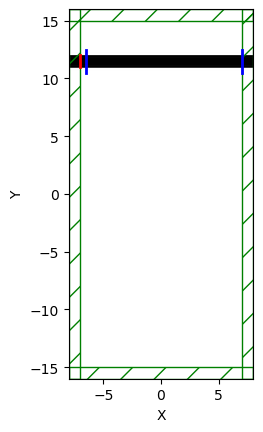

In [17]:
sim.plot2D()
plt.show()

In [18]:
pt = mp.Vector3(0.5*sx-dpml-0.5,wvg_ycen)

#sim.use_output_directory("bend_flux-out")
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

# for normalization run, save flux fields data for reflection plane
straight_refl_data = sim.get_flux_data(refl)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000226974 s
Working in 2D dimensions.
Computational cell is 16 x 32 x 0 with resolution 10
     block, center = (0,11.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.105245 s
-----------
field decay(t = 50.050000000000004): 4.825189380557793e-09 / 4.825189380557793e-09 = 1.0
field decay(t = 100.05000000000001): 0.02880180987942579 / 0.02880180987942579 = 1.0
field decay(t = 150.1): 0.026893465093385745 / 0.02880180987942579 = 0.93374219210428
field decay(t = 200.15): 2.315839732232652e-13 / 0.02880180987942579 = 8.040604885344178e-12
run 0 finished at t = 200.15 (4003 timesteps)


In [19]:
# save incident power for transmission plane
straight_tran_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000267029 s
Working in 2D dimensions.
Computational cell is 16 x 32 x 0 with resolution 10
     block, center = (-2,11.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,-2,0)
          size (1,28,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0916841 s
-----------
     block, center = (-2,11.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,-2,0)
          size (1,28,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


[]

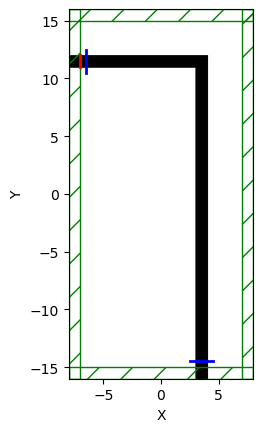

In [20]:
sim.reset_meep()

geometry = [mp.Block(mp.Vector3(sx-pad,w,mp.inf), center=mp.Vector3(-0.5*pad,wvg_ycen), material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(w,sy-pad,mp.inf), center=mp.Vector3(wvg_xcen,-0.5*pad), material=mp.Medium(epsilon=12))]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

# reflected flux
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran_fr = mp.FluxRegion(center=mp.Vector3(wvg_xcen,(-0.5*sy+dpml+0.5),0), size=mp.Vector3(2*w,0,0), direction = mp.Y)
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(refl, straight_refl_data)

pt = mp.Vector3(wvg_xcen,-0.5*sy+dpml+0.5)

sim.plot2D()
plt.plot()


In [21]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

field decay(t = 50.050000000000004): 1.697652269444898e-10 / 1.697652269444898e-10 = 1.0
field decay(t = 100.05000000000001): 4.691071063910565e-07 / 4.691071063910565e-07 = 1.0
field decay(t = 150.1): 2.992872733686373e-07 / 4.691071063910565e-07 = 0.6379934758846859
field decay(t = 200.15): 0.00392781356527229 / 0.00392781356527229 = 1.0
field decay(t = 250.20000000000002): 0.0001500908193907398 / 0.00392781356527229 = 0.038212307406279594
field decay(t = 300.2): 8.806226395662631e-11 / 0.00392781356527229 = 2.242017409767806e-08
run 0 finished at t = 300.2 (6004 timesteps)


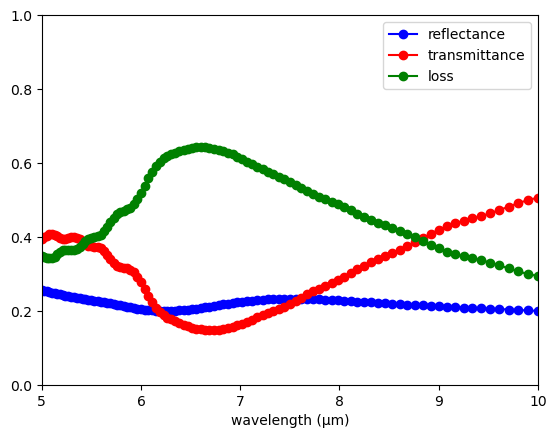

In [22]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-bend_refl_flux[i]/straight_tran_flux[i])
    Ts = np.append(Ts,-bend_tran_flux[i]/straight_tran_flux[i])

if mp.am_master():
    plt.figure()
    plt.plot(wl,Rs,'bo-',label='reflectance')
    plt.plot(wl,Ts,'ro-',label='transmittance')
    plt.plot(wl,1-Rs-Ts,'go-',label='loss')
    plt.axis([5.0, 10.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()

This is the same graph as what we acquired from the example, the changes are in the definition of the bent waveguide and the transmission flux, also the definition of Ts, where we had to add the minus sign.